## 1. CLUSTERING PARTICIONAL(K-MEANS)

Text(0.5, 1.0, 'Datos originales')

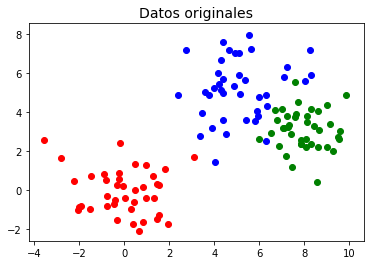

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Create some data
MAXN = 40
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)])
X = np.concatenate([X,[8,3]+1*np.random.randn(MAXN,2)])

# Just for visualization purposes
y = np.concatenate([np.ones((MAXN,1)),2*np.ones((MAXN,1))])
y = np.concatenate([y,3*np.ones((MAXN,1))])

fig = plt.plot()
plt.scatter(X[(y==1).ravel(),0], X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0], X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0], X[(y==3).ravel(),1],color='g')
plt.title('Datos originales',size=14)

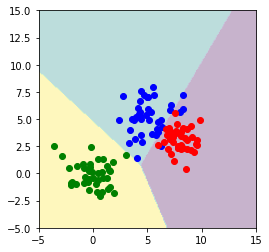

In [2]:
from sklearn import cluster

k=3
clf = cluster.KMeans(init='random', n_clusters=k, random_state=0)
clf.fit(X)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='g')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='r')

x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]

Z = clf.predict(data)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15), alpha=0.3, vmin=0, vmax=k-1)

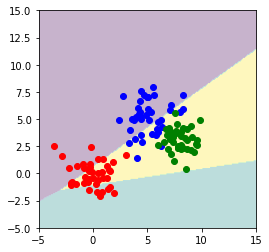

In [3]:
from sklearn import cluster
from scipy.spatial.distance import cdist
K=3

# Select the three centroids: the first three elements of the data
C=X[:3,:]

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120,
            facecolors='none',
            linewidths=2,
            zorder=10)

x=np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Y=cdist(data, C, 'euclidean')
Z=np.argmin(Y, axis=1)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15), alpha=0.3, vmin=0, vmax=k-1)

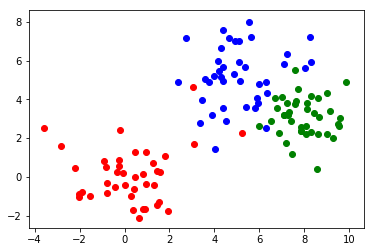

In [4]:
# Compute membership for next iteration 
Y = cdist(X, C, 'euclidean')
y_pred = np.argmin(Y, axis=1)

# Update centroids
for i in range(K):
    C[i,:]=np.mean(X[y_pred==i,:],axis=0)

plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120,
            facecolors='none',
            linewidths=2,
            zorder=10)

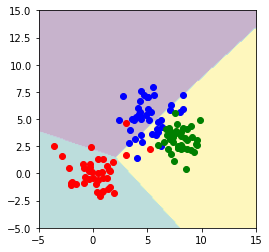

In [5]:
# And the new area of influence
plt.scatter(X[(y==1).ravel(),0],X[(y==1).ravel(),1],color='r')
plt.scatter(X[(y==2).ravel(),0],X[(y==2).ravel(),1],color='b')
plt.scatter(X[(y==3).ravel(),0],X[(y==3).ravel(),1],color='g')
plt.scatter(C[:,0],C[:,1],s=120,
            facecolors='none',
            linewidths=2,
            zorder=10)
x = np.linspace(-5,15,200)
XX,YY = np.meshgrid(x,x)
sz=XX.shape
data = np.c_[XX.ravel(), YY.ravel()]
Y = cdist(data, C, 'euclidean')
Z = np.argmin(Y, axis=1)
plt.imshow(Z.reshape(sz), interpolation='bilinear', origin='lower', extent=(-5,15,-5,15), alpha=0.3, vmin=0, vmax=K-1)

In [ ]:
LA TÉCNICA DEL CODO

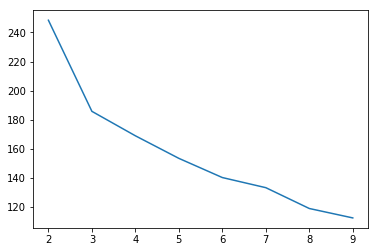

In [11]:
from scipy.spatial import distance
from sklearn import cluster
d=[]
for K in range(2,10):
    clf = cluster.KMeans(init='random', n_clusters=K, random_state=0)
    clf.fit(X)
    y_pred = clf.predict(X)
    p=[]
    for i in range(K):
        p.append(np.sum(distance.cdist(X[y_pred==i,:],[clf.cluster_centers_[i]],'euclidean')))
    d.append(np.sum(p))
plt.plot(np.arange(2,10),d)

In [ ]:
CLUSTERING JERÁRQUICO

(30, 2)


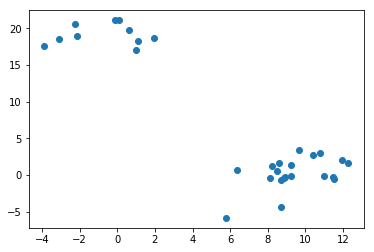

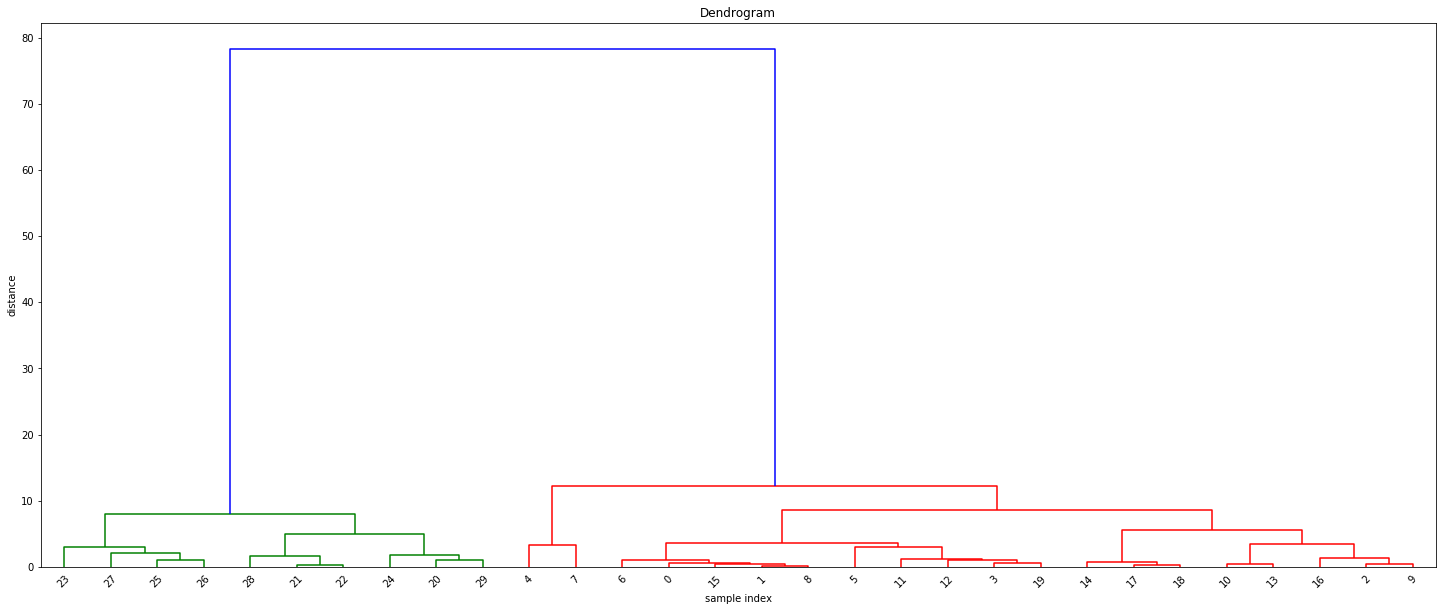

In [15]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

# Generate 2 clusters: a with 100 points, b with 50
np.random.seed(4711)
a = np.random.multivariate_normal([10,0], [[3,1], [1,4]], size=[20,])
b = np.random.multivariate_normal([0,20], [[3,1], [1,4]], size=[10,])
X = np.concatenate((a, b),)
print (X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

# Generate the linkage matrix
Z = linkage(X, 'ward')

# Calculate full dendrogram
plt.figure(figsize=(25,10))
plt.title('Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()

## BICLUSTERING

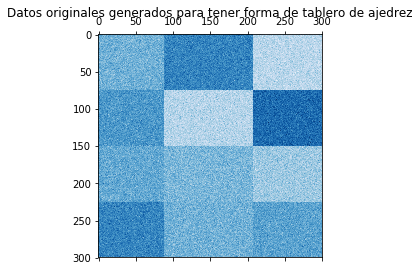

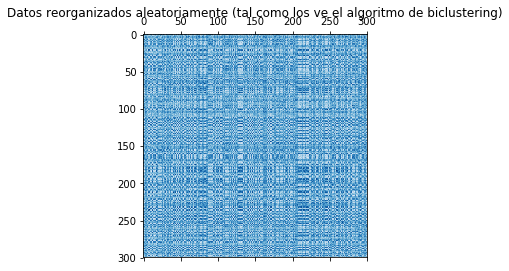

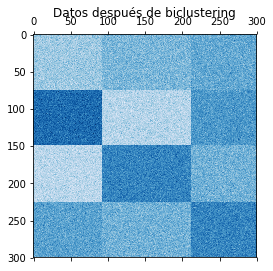

In [17]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_checkerboard
from sklearn.datasets import samples_generator as sg
from sklearn.cluster.bicluster import SpectralBiclustering
from sklearn.metrics import consensus_score

n_clusters = (4, 3)
data, rows, columns = make_checkerboard(
    shape=(300, 300), n_clusters=n_clusters, noise=10,
    shuffle=False, random_state=0)

plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Datos originales generados para tener forma de tablero de ajedrez")

data, row_idx, col_idx = sg._shuffle(data, random_state=0)
plt.matshow(data, cmap=plt.cm.Blues)
plt.title("Datos reorganizados aleatoriamente (tal como los ve el algoritmo de biclustering)")

model = SpectralBiclustering(n_clusters=n_clusters, method='log',
                             random_state=0)
model.fit(data)
fit_data = data[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)
plt.title("Datos después de biclustering")

plt.show()